In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
plt.rcParams['figure.figsize'] = [15, 15]

In [4]:
all_courses = pd.read_csv("../data/uoft-first-year-data-2020-07-28.csv")

In [5]:
df1 = all_courses[all_courses.teachingMethod.eq('LEC')]

In [6]:
fall_year_sections = df1[df1.section.isin(["F", "Y"])]

In [7]:
fall_year_sections

,code,org,section,enrollmentCapacity,actualEnrolment,deliveryMode,teachingMethod,enrollmentControls
0,USA200H1,CSUS,F,60,21,ONLSYNC,LEC,*
9,USA311H1,CSUS,F,25,15,ONLSYNC,LEC,*
10,USA312H1,CSUS,F,30,6,ONLSYNC,LEC,*
13,USA313H1,CSUS,F,15,2,ONLASYNC,LEC,*
16,USA403H1,CSUS,F,4,3,CLASS,LEC,*
...,...,...,...,...,...,...,...,...
10976,WDW196H1,WDW,F,13,13,ONLSYNC,LEC,1
10977,WDW199H1,WDW,F,12,5,CLASS,LEC,1
10978,WDW199H1,WDW,F,13,6,ONLSYNC,LEC,1
10979,WDW235H1,WDW,F,26,13,CLASS,LEC,2


In [8]:
sections_with_enrolment = fall_year_sections.groupby(['code', 'section']).filter(lambda section: section['actualEnrolment'].sum() > 0 and section['enrollmentCapacity'].all())

In [9]:
sections_with_enrolment['enrollmentPercentage'] = sections_with_enrolment.apply(lambda row: row['actualEnrolment'] / row['enrollmentCapacity'], axis=1)

In [10]:
sections_with_enrolment

,code,org,section,enrollmentCapacity,actualEnrolment,deliveryMode,teachingMethod,enrollmentControls,enrollmentPercentage
0,USA200H1,CSUS,F,60,21,ONLSYNC,LEC,*,0.350000
9,USA311H1,CSUS,F,25,15,ONLSYNC,LEC,*,0.600000
10,USA312H1,CSUS,F,30,6,ONLSYNC,LEC,*,0.200000
13,USA313H1,CSUS,F,15,2,ONLASYNC,LEC,*,0.133333
16,USA403H1,CSUS,F,4,3,CLASS,LEC,*,0.750000
...,...,...,...,...,...,...,...,...,...
10976,WDW196H1,WDW,F,13,13,ONLSYNC,LEC,1,1.000000
10977,WDW199H1,WDW,F,12,5,CLASS,LEC,1,0.416667
10978,WDW199H1,WDW,F,13,6,ONLSYNC,LEC,1,0.461538
10979,WDW235H1,WDW,F,26,13,CLASS,LEC,2,0.500000


In [11]:
sections_with_multiple_delivery_modes = sections_with_enrolment.groupby(['code', 'section']).filter(lambda section: len(section['deliveryMode'].unique()) > 1)

In [12]:
sections_with_multiple_delivery_modes

,code,org,section,enrollmentCapacity,actualEnrolment,deliveryMode,teachingMethod,enrollmentControls,enrollmentPercentage
16,USA403H1,CSUS,F,4,3,CLASS,LEC,*,0.750000
17,USA403H1,CSUS,F,4,2,ONLSYNC,LEC,*,0.500000
47,ANT199H1,ANT,F,10,5,CLASS,LEC,1,0.500000
48,ANT199H1,ANT,F,15,2,ONLSYNC,LEC,1,0.133333
109,ARH305H1,ANT,F,20,9,CLASS,LEC,*,0.450000
...,...,...,...,...,...,...,...,...,...
10976,WDW196H1,WDW,F,13,13,ONLSYNC,LEC,1,1.000000
10977,WDW199H1,WDW,F,12,5,CLASS,LEC,1,0.416667
10978,WDW199H1,WDW,F,13,6,ONLSYNC,LEC,1,0.461538
10979,WDW235H1,WDW,F,26,13,CLASS,LEC,2,0.500000


In [13]:
plot_by_enrollment_percentage = lambda df: df.groupby(['code', 'section']).plot(kind='bar', x='deliveryMode', y='enrollmentPercentage')

In [14]:
def group_by_delivery_mode_and_sum(df): 
    frame = df.groupby(['deliveryMode']).agg({'enrollmentCapacity': 'sum', 'actualEnrolment': 'sum'})
    frame['enrollmentPercentage'] = frame.apply(lambda row: row['actualEnrolment'] / row['enrollmentCapacity'] * 100, axis=1)
    return frame

In [15]:
enrollments_with_multiple_modes = group_by_delivery_mode_and_sum(sections_with_multiple_delivery_modes)

In [16]:
enrollments_with_multiple_modes

,enrollmentCapacity,actualEnrolment,enrollmentPercentage
deliveryMode,,,
CLASS,14272,10373,72.680774
ONLASYNC,932,800,85.836910
ONLSYNC,43700,28684,65.638444


In [17]:
all_enrollments = group_by_delivery_mode_and_sum(sections_with_enrolment)

In [18]:
all_enrollments

,enrollmentCapacity,actualEnrolment,enrollmentPercentage
deliveryMode,,,
CLASS,14893,10779,72.376284
ONLASYNC,30778,25174,81.792189
ONLSYNC,110053,77555,70.470591


In [19]:
first_year_sections = sections_with_multiple_delivery_modes[sections_with_multiple_delivery_modes.enrollmentControls.eq('1')]

In [20]:
first_year_enrollments = group_by_delivery_mode_and_sum(first_year_sections)

In [21]:
first_year_enrollments

,enrollmentCapacity,actualEnrolment,enrollmentPercentage
deliveryMode,,,
CLASS,1116,820,73.476703
ONLASYNC,100,100,100.000000
ONLSYNC,4184,3498,83.604207


In [22]:
priority_sections = sections_with_multiple_delivery_modes[sections_with_multiple_delivery_modes.enrollmentControls.notnull()]

In [23]:
priority_enrollments = group_by_delivery_mode_and_sum(priority_sections)

In [24]:
priority_enrollments

,enrollmentCapacity,actualEnrolment,enrollmentPercentage
deliveryMode,,,
CLASS,8811,6548,74.316196
ONLASYNC,887,766,86.358512
ONLSYNC,28636,19314,67.446571


In [25]:
plot = lambda df: df[['enrollmentPercentage', 'actualEnrolment']].plot(secondary_y=['actualEnrolment'], kind='bar', rot=0)

<AxesSubplot:xlabel='deliveryMode'>

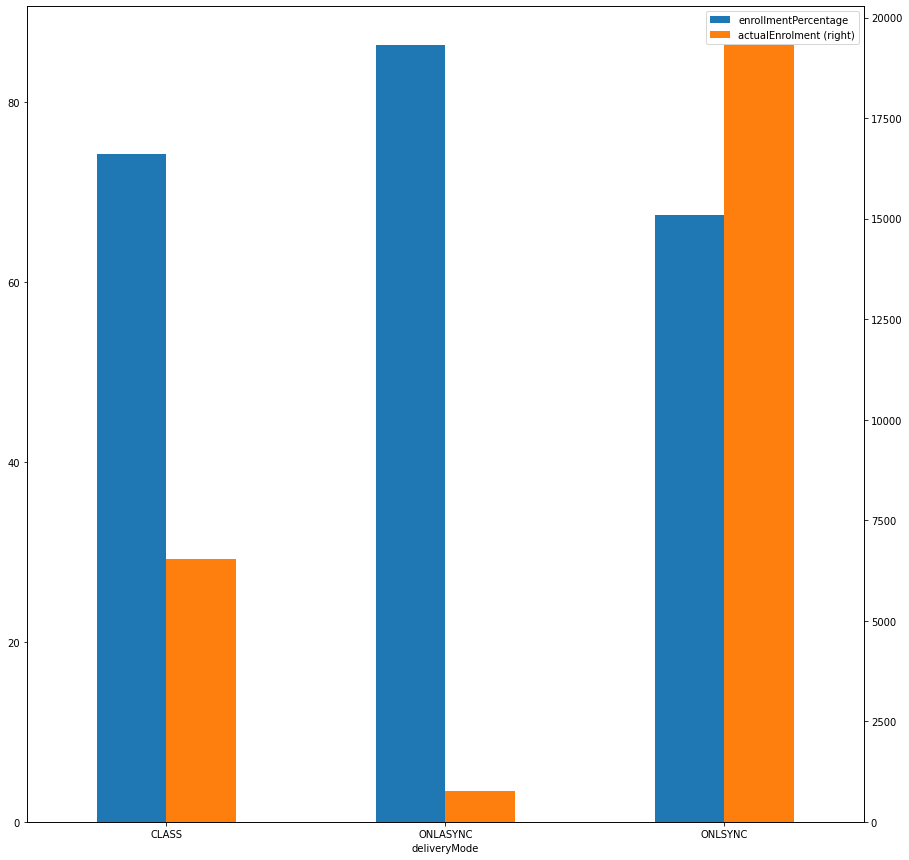

In [26]:
plot(priority_enrollments)

<AxesSubplot:xlabel='deliveryMode'>

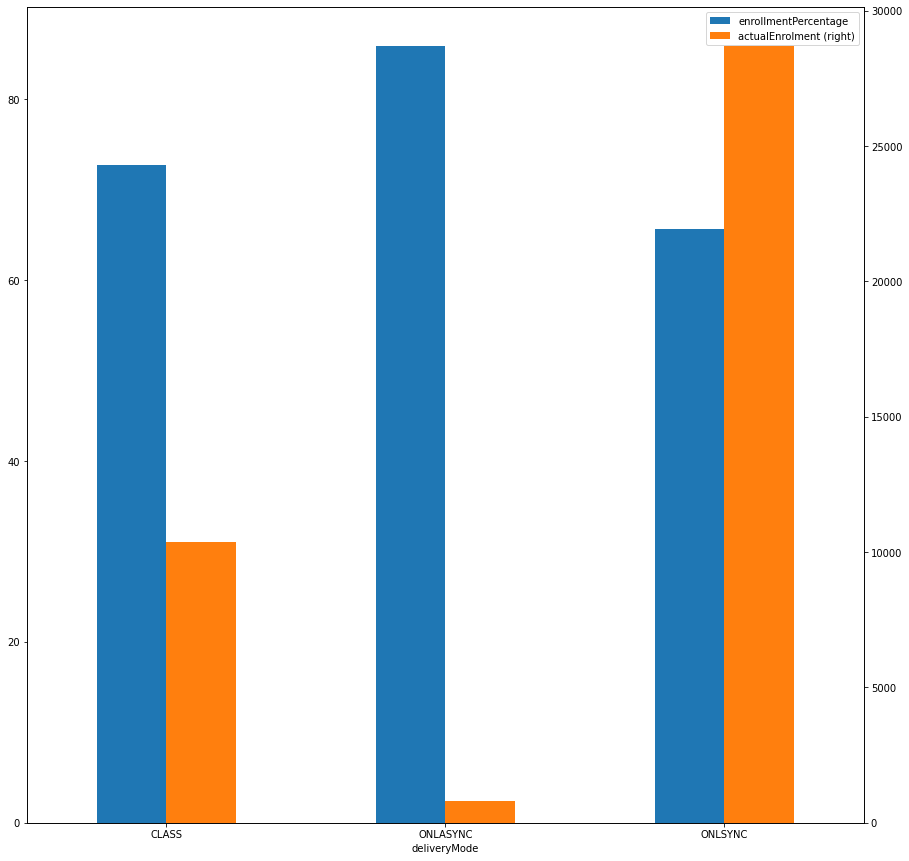

In [27]:
plot(enrollments_with_multiple_modes)